In [43]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from transformers import AutoTokenizer, RobertaModel, BertTokenizer, BertModel
# from surprisal import AutoHuggingFaceModel
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import shuffle
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import joblib

from utils import *
from word_fixations import *
from word_properties import *
from regression_model import *
from pretty_plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# words_dict_023 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_023.csv', properties_dir='properties\properties_romanian_023')
words_dict_008 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_008.csv', properties_dir='properties\properties_romanian_008')
words_dict_009 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_009.csv', properties_dir='properties\properties_romanian_009')
words_dict_010 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_010.csv', properties_dir='properties\properties_romanian_009')
words_dict_011 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_011.csv', properties_dir='properties\properties_romanian_011')

In [19]:
# words_dict_023 = compute_average_TRT(words_dict_023)
words_dict_008 = compute_average_TRT(words_dict_008)
words_dict_009 = compute_average_TRT(words_dict_009)
words_dict_010 = compute_average_TRT(words_dict_010)
words_dict_011 = compute_average_TRT(words_dict_011)

In [20]:
words_dict = merge_words_dicts([words_dict_010, words_dict_009, words_dict_008, words_dict_011])

In [2]:
words_dict = get_merged_words_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_merged.csv', properties_dir='properties\properties_romanian_009')

In [21]:
for stimulus_key in words_dict:
	print(f"Stimulus: {stimulus_key}")
	for word_idx in words_dict[stimulus_key]:
		print(f"  Word Index: {word_idx}")
		word = words_dict[stimulus_key][word_idx]['word']
		sentence = words_dict[stimulus_key][word_idx]['sentence']
		word_idx_in_sentence = words_dict[stimulus_key][word_idx]['word_idx_in_sentence']
		properties = words_dict[stimulus_key][word_idx]['properties']
		average_TRT = words_dict[stimulus_key][word_idx]['average_TRT']
		print(f"    Word: {word}")
		print(f"    Sentence: {sentence}")
		print(f"    Word Index in Sentence: {word_idx}")
		print(f"    Properties: {properties}")
		print(f"    Average TRT: {average_TRT}")
		for subject_id in words_dict[stimulus_key][word_idx]['subjects_fixations']:
			print(f"      Subject ID: {subject_id}")
			fixations = words_dict[stimulus_key][word_idx]['subjects_fixations'][subject_id]
			print(f"        Fixations: {fixations}")

Stimulus: arg_pisacowsmilk_10_page_1
  Word Index: 0
    Word: Laptele
    Sentence: Laptele de vacă - Introducere
    Word Index in Sentence: 0
    Properties: <word_properties.WordProperties object at 0x00000231E96013D0>
    Average TRT: 289.0
      Subject ID: 10
        Fixations: Fixations: [236], TRT: 236
      Subject ID: 9
        Fixations: Fixations: [120], TRT: 120
      Subject ID: 8
        Fixations: Fixations: [197, 305], TRT: 502
      Subject ID: 11
        Fixations: Fixations: [150, 148], TRT: 298
  Word Index: 1
    Word: de
    Sentence: Laptele de vacă - Introducere
    Word Index in Sentence: 1
    Properties: <word_properties.WordProperties object at 0x00000231E96016A0>
    Average TRT: 106.5
      Subject ID: 10
        Fixations: Fixations: [263], TRT: 263
      Subject ID: 9
        Fixations: Fixations: [], TRT: 0
      Subject ID: 8
        Fixations: Fixations: [163], TRT: 163
      Subject ID: 11
        Fixations: Fixations: [], TRT: 0
  Word Index: 2
  

In [50]:
# Save the merged words_dict
save_merged_dict_to_csv(words_dict, 'word_sentence_fixations/words_dict_romanian_merged_008_009_010_011.csv')

In [22]:
# Create a dictionary excluding non-page stimuli
words_dict_reading = {}
for stimulus_key in words_dict:
	if 'page' in stimulus_key:
		words_dict_reading[stimulus_key] = words_dict[stimulus_key]

In [23]:
# Compute word properties for each word in the words_dict_reading
for stimulus_key in words_dict_reading:
	for word_idx in words_dict_reading[stimulus_key]:
		print(f"Computing properties for {stimulus_key} - Word Index: {word_idx}")
		words_dict_reading[stimulus_key][word_idx]['properties'].compute_properties()

Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 0
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 1
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 2
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 3
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 4
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 5
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 6
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for ar

In [10]:
# Save the properties
save_path = 'properties\properties_romanian_009\properties.csv'
save_properties_to_csv(words_dict_reading, save_path)

In [24]:
# Compute properties that require all sentences
# Compute transformer embeddings for each word in the words_dict_reading
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")
model = BertModel.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")
model.to(device)

# Extract sentences and word_ids
sentences = [words_dict_reading[stimulus_key][word_idx]['sentence'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]
# Eliminate duplicates but keep the original order
seen = set()
unique_sentences = [s for s in sentences if not (s in seen or seen.add(s))]
sentences = unique_sentences
word_ids = [words_dict_reading[stimulus_key][word_idx]['word_id'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]

# print(f"Sentences: {sentences}")
# print(f"Word IDs: {word_ids}")

model.eval()

with torch.no_grad():
    encoded_inputs = tokenizer(sentences, return_tensors='pt', padding=True, return_offsets_mapping=True, truncation=False)

    offsets = encoded_inputs.pop("offset_mapping")

    outputs = model(**encoded_inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states

embeddings_first_layer = hidden_states[1]
embeddings_middle_layer = hidden_states[6]
embeddings_last_layer = hidden_states[-1]
embeddings_avg = torch.mean(torch.stack(hidden_states), dim=0)

bert_embeddings_first_layer = transformer_embedding(word_ids=word_ids, embeddings=embeddings_first_layer, offsets=offsets)
bert_embeddings_middle_layer = transformer_embedding(word_ids=word_ids, embeddings=embeddings_middle_layer, offsets=offsets)
bert_embeddings_last_layer = transformer_embedding(word_ids=word_ids, embeddings=embeddings_last_layer, offsets=offsets)
bert_embeddings_avg = transformer_embedding(word_ids=word_ids, embeddings=embeddings_avg, offsets=offsets)

# Add the BERT embeddings to the words_dict_reading
for stimulus_key in words_dict_reading:
	for word_idx in words_dict_reading[stimulus_key]:
		word_id = words_dict_reading[stimulus_key][word_idx]['word_id']
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_first_layer = bert_embeddings_first_layer[word_id]
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_middle_layer = bert_embeddings_middle_layer[word_id]
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_last_layer = bert_embeddings_last_layer[word_id]
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_avg = bert_embeddings_avg[word_id]

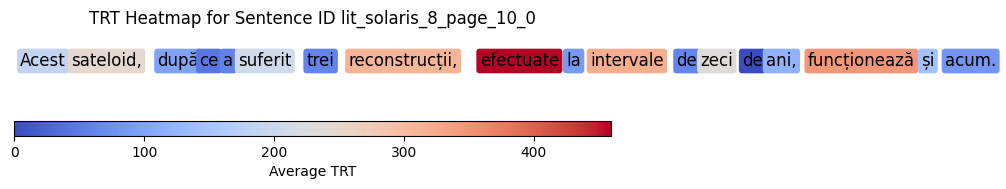

In [39]:
# Heatmap plot
plot_sentence_heatmap(words_dict=words_dict, sentence_id='lit_solaris_8_page_10_0')

In [25]:
# Numpy arrays
trt_reading = np.array([words_dict_reading[stimulus_key][word_idx]['average_TRT'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
length_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].length for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
num_tokens_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].num_tokens for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
freq_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].frequency for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
surprisal_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].surprisal for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
# surprisal_huggingface_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].surprisal_huggingface for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_first_layer_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_first_layer for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_middle_layer_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_middle_layer for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_last_layer_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_last_layer for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_avg_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_avg for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])

In [26]:
length_corr_reading = np.corrcoef(trt_reading, length_reading)[0, 1]
num_tokens_corr_reading = np.corrcoef(trt_reading, num_tokens_reading)[0, 1]
freq_corr_reading = np.corrcoef(trt_reading, freq_reading)[0, 1]
surprisal_corr_reading = np.corrcoef(trt_reading, surprisal_reading)[0, 1]
print(f"Correlation between TRT and length (reading): {length_corr_reading}")
print(f"Correlation between TRT and number of tokens (reading): {num_tokens_corr_reading}")
print(f"Correlation between TRT and frequency (reading): {freq_corr_reading}")
print(f"Correlation between TRT and surprisal (reading): {surprisal_corr_reading}")

length_num_tokens_corr_reading = np.corrcoef(length_reading, num_tokens_reading)[0, 1]
length_freq_corr_reading = np.corrcoef(length_reading, freq_reading)[0, 1]
length_surprisal_corr_reading = np.corrcoef(length_reading, surprisal_reading)[0, 1]
num_tokens_freq_corr_reading = np.corrcoef(num_tokens_reading, freq_reading)[0, 1]
num_tokens_surprisal_corr_reading = np.corrcoef(num_tokens_reading, surprisal_reading)[0, 1]
freq_surprisal_corr_reading = np.corrcoef(freq_reading, surprisal_reading)[0, 1]
print(f"Correlation between length and number of tokens (reading): {length_num_tokens_corr_reading}")
print(f"Correlation between length and frequency (reading): {length_freq_corr_reading}")
print(f"Correlation between length and surprisal (reading): {length_surprisal_corr_reading}")
print(f"Correlation between number of tokens and frequency (reading): {num_tokens_freq_corr_reading}")
print(f"Correlation between number of tokens and surprisal (reading): {num_tokens_surprisal_corr_reading}")
print(f"Correlation between frequency and surprisal (reading): {freq_surprisal_corr_reading}")

Correlation between TRT and length (reading): 0.6254604045716433
Correlation between TRT and number of tokens (reading): 0.318853081709021
Correlation between TRT and frequency (reading): -0.3788422850856901
Correlation between TRT and surprisal (reading): 0.35510247318236493
Correlation between length and number of tokens (reading): 0.4479885856504325
Correlation between length and frequency (reading): -0.5313246514957405
Correlation between length and surprisal (reading): 0.4837265545542947
Correlation between number of tokens and frequency (reading): -0.18810101511978428
Correlation between number of tokens and surprisal (reading): 0.6289262926042664
Correlation between frequency and surprisal (reading): -0.35260650140956323


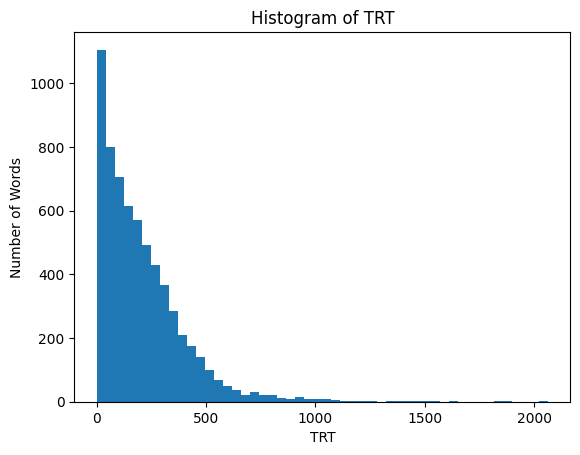

In [56]:
# Histogram of TRT
# sns.histplot(trt_reading, bins=50, kde=True)
plt.hist(trt_reading, bins=50)
plt.title('Histogram of TRT')
plt.xlabel('TRT')
plt.ylabel('Number of Words')
plt.show()

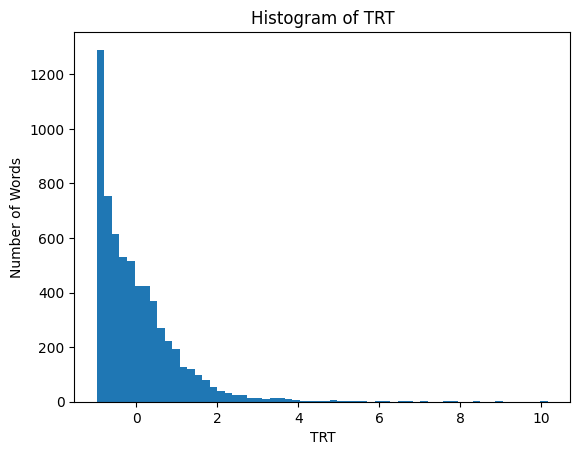

In [9]:
mean_trt = np.mean(trt_reading)
std_trt = np.std(trt_reading)
trt_standardized = (trt_reading - mean_trt) / std_trt

plt.hist(trt_standardized, bins=60)
plt.title('Histogram of TRT')
plt.xlabel('TRT')
plt.ylabel('Number of Words')
plt.show()

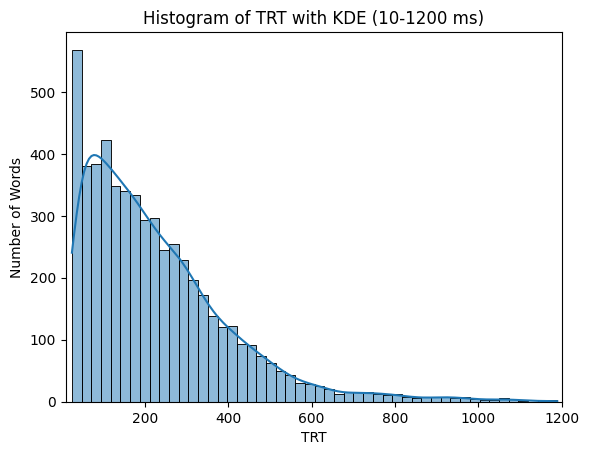

In [58]:
# Histogram of TRT with limits
trt_elim = trt_reading[trt_reading <= 1200]
trt_elim = trt_elim[trt_elim >= 10]
sns.histplot(trt_elim, bins=50, kde=True)
# plt.hist(trt_reading, bins=50)
plt.title('Histogram of TRT with KDE (10-1200 ms)')
plt.xlabel('TRT')
plt.ylabel('Number of Words')
plt.xlim(10, 1200)
plt.show()

In [28]:
# Create a DataFrame from words_dict_reading with columns stimulus, stimulus_key, word_idx, word, sentence_id, sentence, word_idx_in_sentence, trt, and all properties
data = []
for stimulus_key in words_dict_reading:
	for word_idx in words_dict_reading[stimulus_key]:
		word_data = words_dict_reading[stimulus_key][word_idx]
		row = {
			'stimulus': stimulus_key.split('_')[1],
			'stimulus_key': stimulus_key,
			'word_idx': word_idx,
			'word': word_data['word'],
			'sentence_id': word_data['sentence_id'],
			'sentence': word_data['sentence'],
			'word_idx_in_sentence': word_data['word_idx_in_sentence'],
			'trt': word_data['average_TRT'],
			'length': word_data['properties'].length,
			'num_tokens': word_data['properties'].num_tokens,
			'frequency': word_data['properties'].frequency,
			'surprisal': word_data['properties'].surprisal,
			'transformer_embedding_first_layer': word_data['properties'].transformer_embedding_first_layer,
			'transformer_embedding_middle_layer': word_data['properties'].transformer_embedding_middle_layer,
			'transformer_embedding_last_layer': word_data['properties'].transformer_embedding_last_layer,
			'transformer_embedding_avg': word_data['properties'].transformer_embedding_avg,
		}
		data.append(row)
df = pd.DataFrame(data)

In [37]:
unique_sentences = df['sentence_id'].unique()
train_ids, test_ids = train_test_split(unique_sentences, test_size=0.2, random_state=42)

train_df = df[df['sentence_id'].isin(train_ids)].reset_index(drop=True)
test_df = df[df['sentence_id'].isin(test_ids)].reset_index(drop=True)

# features = ['length', 'num_tokens', 'frequency', 'surprisal']
# X_train = train_df[features]
# X_test = test_df[features]

# X_train = np.stack(train_df['transformer_embedding_avg'].values)
# X_test = np.stack(test_df['transformer_embedding_avg'].values)

scalar_features = ['length', 'num_tokens', 'frequency', 'surprisal']
embedding_dim = len(train_df['transformer_embedding_avg'].iloc[0])
embedding_cols = [f'emb_{i}' for i in range(embedding_dim)]
train_embeddings = pd.DataFrame(train_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
test_embeddings = pd.DataFrame(test_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
X_train = pd.concat([train_df[scalar_features].reset_index(drop=True), train_embeddings], axis=1)
X_test = pd.concat([test_df[scalar_features].reset_index(drop=True), test_embeddings], axis=1)

y_train = train_df['trt']
y_test = test_df['trt']

# Shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardize the target variable
y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

models_no_emb = [
    LinearRegression(),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    SGDRegressor(max_iter=1000, tol=1e-3),
    BayesianRidge(),
	SVR(kernel='linear'),
    SVR(kernel='rbf'),
	KNeighborsRegressor(n_neighbors=5),
	RandomForestRegressor(n_estimators=50, random_state=42),
	GradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=3, random_state=42),
	HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42),
    KernelRidge(kernel='linear'),
	KernelRidge(kernel='rbf'),
	MLPRegressor(hidden_layer_sizes=(128, 128), max_iter=1000, learning_rate_init=0.001, random_state=42)
]

models_emb = [
    LinearRegression(),
    ElasticNet(alpha=0.01, l1_ratio=0.5),
    SGDRegressor(max_iter=1000, tol=1e-3),
    BayesianRidge(),
	# SVR(kernel='linear'),
    SVR(kernel='rbf'),
	KNeighborsRegressor(n_neighbors=25),
	RandomForestRegressor(n_estimators=50, random_state=42),
	GradientBoostingRegressor(n_estimators=55, learning_rate=0.1, max_depth=3, random_state=42),
	HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42),
    KernelRidge(kernel='linear'),
	KernelRidge(kernel='rbf'),
	MLPRegressor(hidden_layer_sizes=(128, 256, 128), max_iter=1000, learning_rate_init=0.001, random_state=42)
]

for model in models_emb:
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)

	# Calculate metrics
	mse = mean_squared_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)
	pearson_corr = pearsonr(y_test, y_pred)[0]
	spearman_corr = spearmanr(y_test, y_pred)[0]

	# Convert back to original TRT scale
	y_test_orig = y_test * y_std + y_mean
	y_pred_orig = y_pred * y_std + y_mean
	# Bring the TRT to [0, 100] range
	y_test_100 = (y_test_orig - np.min(y_test_orig)) / (np.max(y_test_orig) - np.min(y_test_orig)) * 100
	y_pred_100 = (y_pred_orig - np.min(y_pred_orig)) / (np.max(y_pred_orig) - np.min(y_pred_orig)) * 100
	# print(f"y_test_100: {y_test_100}")
	# print(f"y_pred_100: {y_pred_100}")
	# print(f"y_test_100 min: {np.min(y_test_100)}, max: {np.max(y_test_100)}")
	# print(f"y_pred_100 min: {np.min(y_pred_100)}, max: {np.max(y_pred_100)}")
	mae = mean_absolute_error(y_test_100, y_pred_100)
	acc = 100 - mae

	print(f"Model: {model.__class__.__name__}")
	print(f"  MSE: {mse:.4f}")
	print(f"  R^2: {r2:.4f}")
	print(f"  Pearson Correlation: {pearson_corr:.4f}")
	print(f"  Spearman Correlation: {spearman_corr:.4f}")
	# print(f"  MAE: {mae:.4f}")
	print(f"  Accuracy: {acc:.4f}")

	# Plot predictions vs true values for a sentence
	test_df = test_df.copy()
	test_df['pred_trt'] = y_pred
	sentence_id_to_plot = test_df['sentence_id'].iloc[0]
	sentence_df = test_df[test_df['sentence_id'] == sentence_id_to_plot]
	sentence_df = sentence_df.sort_values(by='word_idx_in_sentence')
	words = sentence_df['word'].tolist()
	true_trt = sentence_df['trt'].tolist()
	pred_trt = sentence_df['pred_trt'].tolist()
	# Bring pred_trt to the original TRT scale
	pred_trt = np.array(pred_trt) * y_std + y_mean
	# plot_pred_and_true(pred_trt=pred_trt, true_trt=true_trt, words=words)

X_train shape: (5041, 772), y_train shape: (5041,)
X_test shape: (1286, 772), y_test shape: (1286,)
Model: LinearRegression
  MSE: 0.6116
  R^2: 0.3828
  Pearson Correlation: 0.6424
  Spearman Correlation: 0.6747
  Accuracy: 90.0768
Model: ElasticNet
  MSE: 0.5398
  R^2: 0.4553
  Pearson Correlation: 0.6777
  Spearman Correlation: 0.7255
  Accuracy: 90.2072
Model: SGDRegressor
  MSE: 0.6995
  R^2: 0.2941
  Pearson Correlation: 0.6187
  Spearman Correlation: 0.6387
  Accuracy: 86.2450
Model: BayesianRidge
  MSE: 0.5430
  R^2: 0.4520
  Pearson Correlation: 0.6732
  Spearman Correlation: 0.7217
  Accuracy: 87.5444
Model: SVR
  MSE: 0.5475
  R^2: 0.4475
  Pearson Correlation: 0.6810
  Spearman Correlation: 0.7212
  Accuracy: 81.3403
Model: KNeighborsRegressor
  MSE: 0.5998
  R^2: 0.3947
  Pearson Correlation: 0.6284
  Spearman Correlation: 0.6902
  Accuracy: 78.0816
Model: RandomForestRegressor
  MSE: 0.5366
  R^2: 0.4585
  Pearson Correlation: 0.6775
  Spearman Correlation: 0.7305
  Accur

X_train shape: (5041, 772), y_train shape: (5041,)
X_test shape: (535, 772), y_test shape: (535,)
Validation loss: 0.6143195629119873
R^2 on validation set: 0.3920615315437317
Pearson correlation on validation set: 0.6324004492564173
Spearman correlation on validation set: 0.7166022403410817
Epoch 5, Loss: 0.27691227197647095, LR: 0.0001
Validation loss: 0.6547625064849854
R^2 on validation set: 0.35203874111175537
Pearson correlation on validation set: 0.6349319744257335
Spearman correlation on validation set: 0.7230033739911221
Epoch 10, Loss: 0.16983167827129364, LR: 1e-05
Validation loss: 0.6823595762252808
R^2 on validation set: 0.3247283101081848
Pearson correlation on validation set: 0.6225546427389638
Spearman correlation on validation set: 0.7157707597158964
Epoch 15, Loss: 0.11348295956850052, LR: 1.0000000000000002e-06
Validation loss: 0.6830245852470398
R^2 on validation set: 0.3240702748298645
Pearson correlation on validation set: 0.6216059316513953
Spearman correlation o

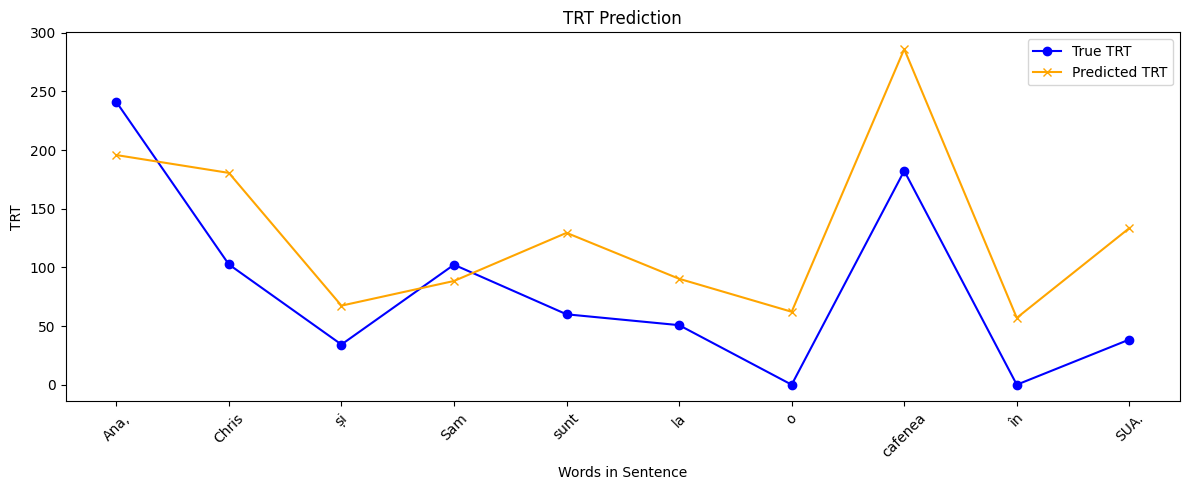

In [40]:
# stimuli_to_exclude = ['pisacowsmilk']
# df_filt = df[~df["stimulus"].isin(stimuli_to_exclude)].reset_index(drop=True)
unique_sentences = df["sentence_id"].unique()
train_ids, test_ids = train_test_split(unique_sentences, test_size=0.2, random_state=42)
train_df = df[df['sentence_id'].isin(train_ids)].reset_index(drop=True)
test_df = df[df['sentence_id'].isin(test_ids)].reset_index(drop=True)
test_ids, dev_ids = train_test_split(test_ids, test_size=0.5, random_state=42)
dev_df = df[df['sentence_id'].isin(dev_ids)].reset_index(drop=True)
test_df = df[df['sentence_id'].isin(test_ids)].reset_index(drop=True)

# features = ['length', 'num_tokens', 'frequency', 'surprisal']
# X_train = train_df[features]
# X_dev = dev_df[features]
# X_test = test_df[features]

# X_train = np.stack(train_df['transformer_embedding_avg'].values)
# X_dev = np.stack(dev_df['transformer_embedding_avg'].values)
# X_test = np.stack(test_df['transformer_embedding_avg'].values)

scalar_features = ['length', 'num_tokens', 'frequency', 'surprisal']
embedding_dim = len(train_df['transformer_embedding_avg'].iloc[0])
embedding_cols = [f'emb_{i}' for i in range(embedding_dim)]
train_embeddings = pd.DataFrame(train_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
dev_embeddings = pd.DataFrame(dev_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
test_embeddings = pd.DataFrame(test_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
X_train = pd.concat([train_df[scalar_features].reset_index(drop=True), train_embeddings], axis=1)
X_dev = pd.concat([dev_df[scalar_features].reset_index(drop=True), dev_embeddings], axis=1)
X_test = pd.concat([test_df[scalar_features].reset_index(drop=True), test_embeddings], axis=1)

y_train = train_df['trt']
y_dev = dev_df['trt']
y_test = test_df['trt']

# Shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Standardize the trt
mean_trt = np.mean(y_train)
std_trt = np.std(y_train)
y_train = (y_train - mean_trt) / std_trt
y_dev = (y_dev - mean_trt) / std_trt
y_test = (y_test - mean_trt) / std_trt

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_dev_tensor = torch.tensor(X_dev, dtype=torch.float32)
y_dev_tensor = torch.tensor(y_dev, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
validation_dataset = TensorDataset(X_dev_tensor, y_dev_tensor)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

model = RegressionModel(input_dim=X_train.shape[1])
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
save_path = 'best_regression_model.pth'
num_epochs = 30
train_regression_model(model=model, train_loader=train_loader, validation_loader=validation_loader, criterion=criterion, optimizer=optimizer, scheduler=scheduler, save_path=save_path, num_epochs=num_epochs)
# Load the best model
model.load_state_dict(torch.load(save_path))
loss_test, r2_test, pearson_test, spearman_test, y_pred = evaluate_regression_model(model=model, test_loader=test_loader, criterion=criterion)

# Convert back to original TRT scale
y_pred_orig = y_pred * std_trt + mean_trt
y_true_orig = y_test_tensor.numpy() * std_trt + mean_trt
# Bring the TRT to [0, 100] range
y_pred_100 = (y_pred_orig - np.min(y_pred_orig)) / (np.max(y_pred_orig) - np.min(y_pred_orig)) * 100
y_true_100 = (y_true_orig - np.min(y_true_orig)) / (np.max(y_true_orig) - np.min(y_true_orig)) * 100
mae = mean_absolute_error(y_true_100, y_pred_100)
acc = 100 - mae

print(f"Test Loss: {loss_test:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Test Pearson Correlation: {pearson_test:.4f}")
print(f"Test Spearman Correlation: {spearman_test:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Plot predictions vs true values for a sentence
test_df = test_df.copy()
test_df['pred_trt'] = y_pred
sentence_id_to_plot = test_df['sentence_id'].iloc[0]
sentence_df = test_df[test_df['sentence_id'] == sentence_id_to_plot]
sentence_df = sentence_df.sort_values(by='word_idx_in_sentence')
words = sentence_df['word'].tolist()
true_trt = sentence_df['trt'].tolist()
pred_trt = sentence_df['pred_trt'].tolist()
# De-standardize the predictions
pred_trt = np.array(pred_trt) * std_trt + mean_trt
plot_pred_and_true(pred_trt=pred_trt, true_trt=true_trt, words=words)

In [59]:
# Assumes device is defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Feature preparation function
def prepare_features_by_mode(train_df, dev_df, test_df, mode='combined'):
    scalar_features = ['length', 'num_tokens', 'frequency', 'surprisal']
    
    if mode == 'scalar':
        X_train = train_df[scalar_features].reset_index(drop=True)
        X_dev = dev_df[scalar_features].reset_index(drop=True)
        X_test = test_df[scalar_features].reset_index(drop=True)

    elif mode == 'embedding':
        X_train = np.stack(train_df['transformer_embedding_avg'].values)
        X_dev = np.stack(dev_df['transformer_embedding_avg'].values)
        X_test = np.stack(test_df['transformer_embedding_avg'].values)

    elif mode == 'combined':
        embedding_dim = len(train_df['transformer_embedding_avg'].iloc[0])
        embedding_cols = [f'emb_{i}' for i in range(embedding_dim)]
        train_embeddings = pd.DataFrame(train_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
        dev_embeddings = pd.DataFrame(dev_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
        test_embeddings = pd.DataFrame(test_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)

        X_train = pd.concat([train_df[scalar_features].reset_index(drop=True), train_embeddings], axis=1)
        X_dev = pd.concat([dev_df[scalar_features].reset_index(drop=True), dev_embeddings], axis=1)
        X_test = pd.concat([test_df[scalar_features].reset_index(drop=True), test_embeddings], axis=1)
    
    else:
        raise ValueError(f"Unknown mode: {mode}")

    return X_train, X_dev, X_test

# Main loop
modes = ['scalar', 'embedding', 'combined']
stimuli = df['stimulus'].unique()
results = []

for mode in modes:
    print(f"\n=== Feature Mode: {mode.upper()} ===")

    for stimulus in stimuli:
        print(f"\n--- Leaving out stimulus: {stimulus} ---")

        test_df = df[df['stimulus'] == stimulus].reset_index(drop=True)
        train_dev_df = df[df['stimulus'] != stimulus].reset_index(drop=True)

        # Split train and dev sets
        unique_sentences = train_dev_df['sentence_id'].unique()
        train_ids, dev_ids = train_test_split(unique_sentences, test_size=0.1, random_state=42)
        train_df = train_dev_df[train_dev_df['sentence_id'].isin(train_ids)].reset_index(drop=True)
        dev_df = train_dev_df[train_dev_df['sentence_id'].isin(dev_ids)].reset_index(drop=True)

        # Prepare features by mode
        X_train, X_dev, X_test = prepare_features_by_mode(train_df, dev_df, test_df, mode=mode)

        y_train = train_df['trt'].values
        y_dev = dev_df['trt'].values
        y_test = test_df['trt'].values

        # Shuffle training data
        X_train, y_train = shuffle(X_train, y_train, random_state=42)

        # Normalize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_dev = scaler.transform(X_dev)
        X_test = scaler.transform(X_test)

        # Normalize target
        mean_trt = np.mean(y_train)
        std_trt = np.std(y_train)
        y_train = (y_train - mean_trt) / std_trt
        y_dev = (y_dev - mean_trt) / std_trt
        y_test = (y_test - mean_trt) / std_trt

        # Convert to PyTorch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        X_dev_tensor = torch.tensor(X_dev, dtype=torch.float32)
        y_dev_tensor = torch.tensor(y_dev, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        # DataLoaders
        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
        validation_loader = DataLoader(TensorDataset(X_dev_tensor, y_dev_tensor), batch_size=32, shuffle=False)
        test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

        # Model setup
        model = RegressionModel(input_dim=X_train.shape[1])
        model.to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

        save_path = f'model_{mode}_leave_{stimulus}.pth'
        train_regression_model(model, train_loader, validation_loader, criterion, optimizer, scheduler, save_path, num_epochs=30)

        # Evaluate
        model.load_state_dict(torch.load(save_path))
        loss_test, r2_test, pearson_test, spearman_test, y_pred = evaluate_regression_model(
            model=model, test_loader=test_loader, criterion=criterion
        )

        # Rescale predictions
        y_pred_orig = y_pred * std_trt + mean_trt
        y_true_orig = y_test_tensor.numpy() * std_trt + mean_trt
        y_pred_100 = (y_pred_orig - np.min(y_pred_orig)) / (np.max(y_pred_orig) - np.min(y_pred_orig)) * 100
        y_true_100 = (y_true_orig - np.min(y_true_orig)) / (np.max(y_true_orig) - np.min(y_true_orig)) * 100
        mae = mean_absolute_error(y_true_100, y_pred_100)
        acc = 100 - mae

        print(f"Stimulus: {stimulus} | Mode: {mode}")
        print(f"Loss: {loss_test:.4f}, R2: {r2_test:.4f}, Pearson: {pearson_test:.4f}, Spearman: {spearman_test:.4f}, Accuracy: {acc:.2f}")

        # Store results
        results.append({
            'stimulus': stimulus,
            'mode': mode,
            'loss': loss_test,
            'r2': r2_test,
            'pearson': pearson_test,
            'spearman': spearman_test,
            'accuracy': acc,
        })

# Results to DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv('leave_one_out_results.csv', index=False)
print(results_df)


=== Feature Mode: SCALAR ===

--- Leaving out stimulus: pisacowsmilk ---
Validation loss: 0.4049972891807556
R^2 on validation set: 0.4225194454193115
Pearson correlation on validation set: 0.6557291961904694
Spearman correlation on validation set: 0.7357328051679284
Epoch 5, Loss: 0.4975601136684418, LR: 0.0001
Validation loss: 0.394298255443573
R^2 on validation set: 0.4377750754356384
Pearson correlation on validation set: 0.6651065360661388
Spearman correlation on validation set: 0.740997353689246
Epoch 10, Loss: 0.5947301983833313, LR: 1e-05
Validation loss: 0.3970651924610138
R^2 on validation set: 0.43382978439331055
Pearson correlation on validation set: 0.6642531540516303
Spearman correlation on validation set: 0.7408198654016441
Epoch 15, Loss: 0.3150433599948883, LR: 1.0000000000000002e-06
Validation loss: 0.39630788564682007
R^2 on validation set: 0.4349096417427063
Pearson correlation on validation set: 0.6638986485986803
Spearman correlation on validation set: 0.74060591

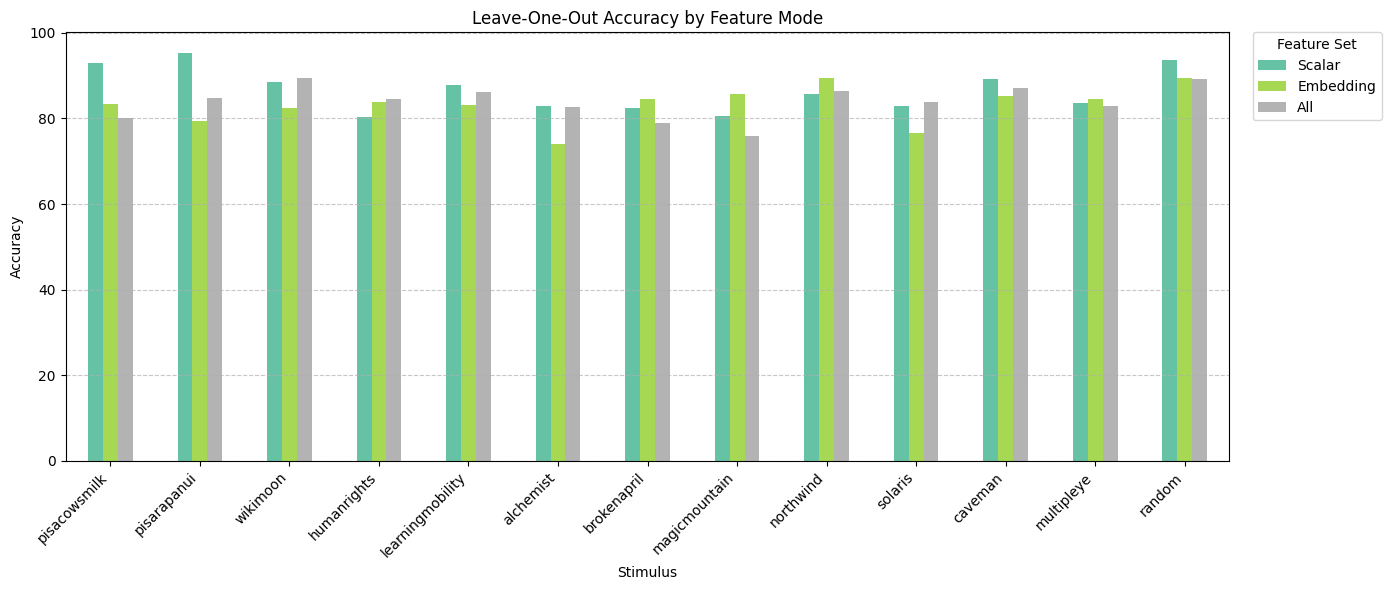

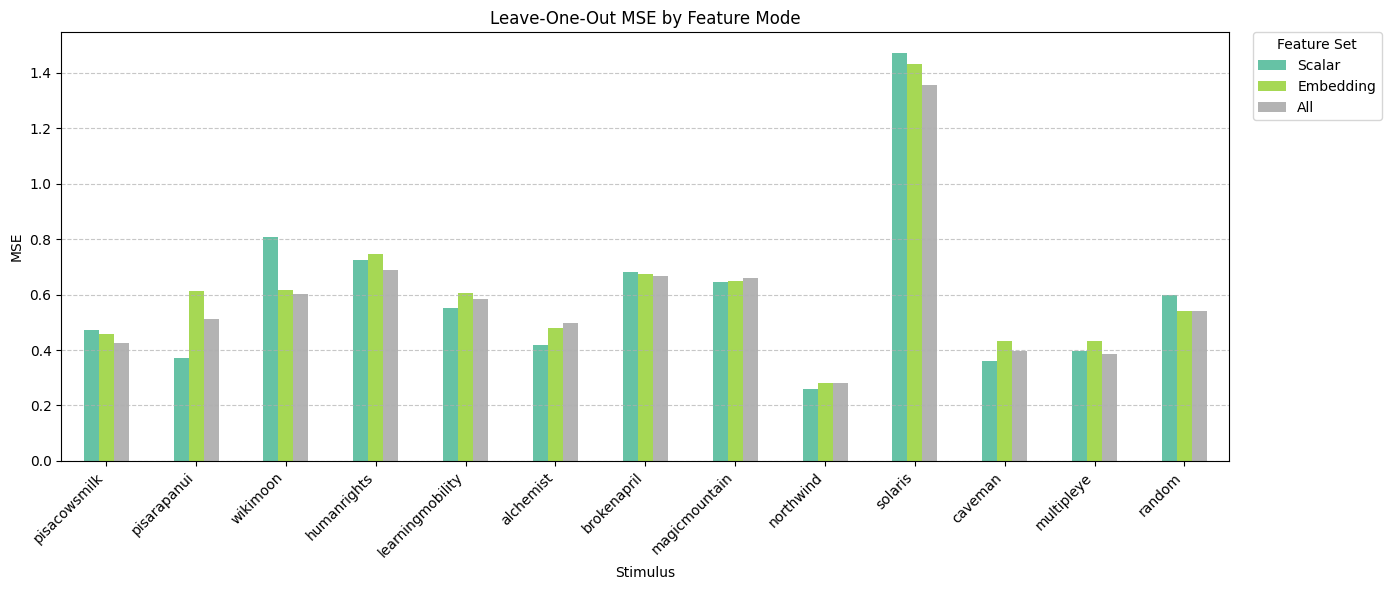

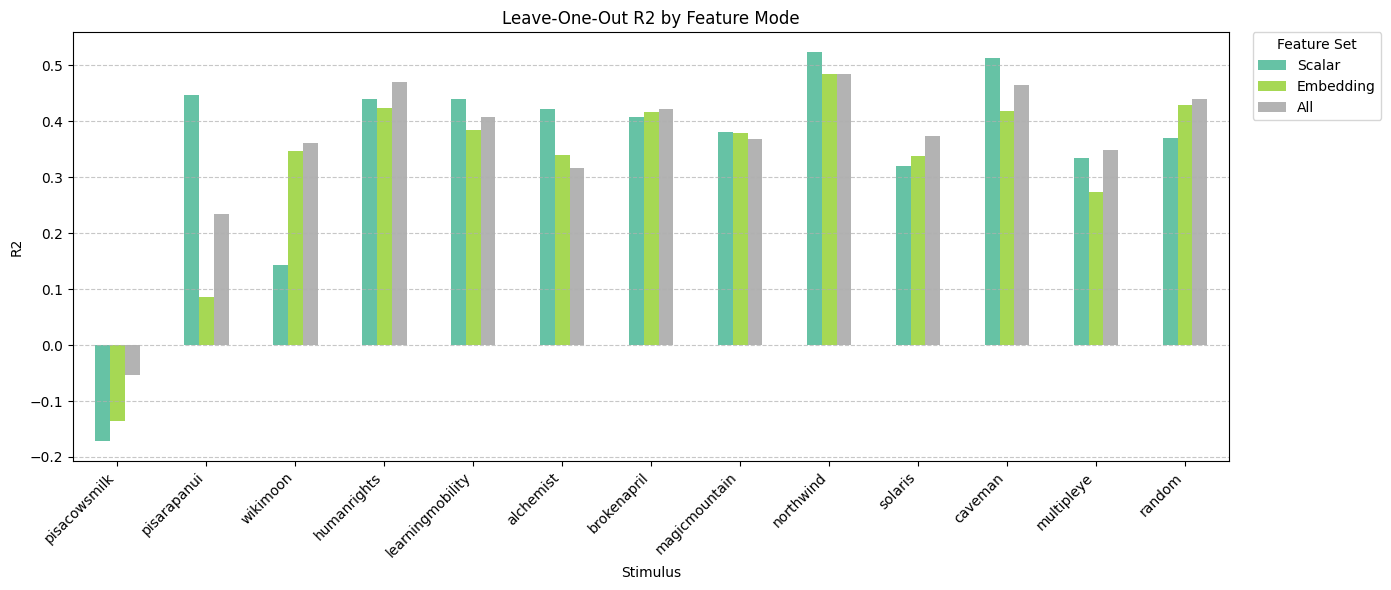

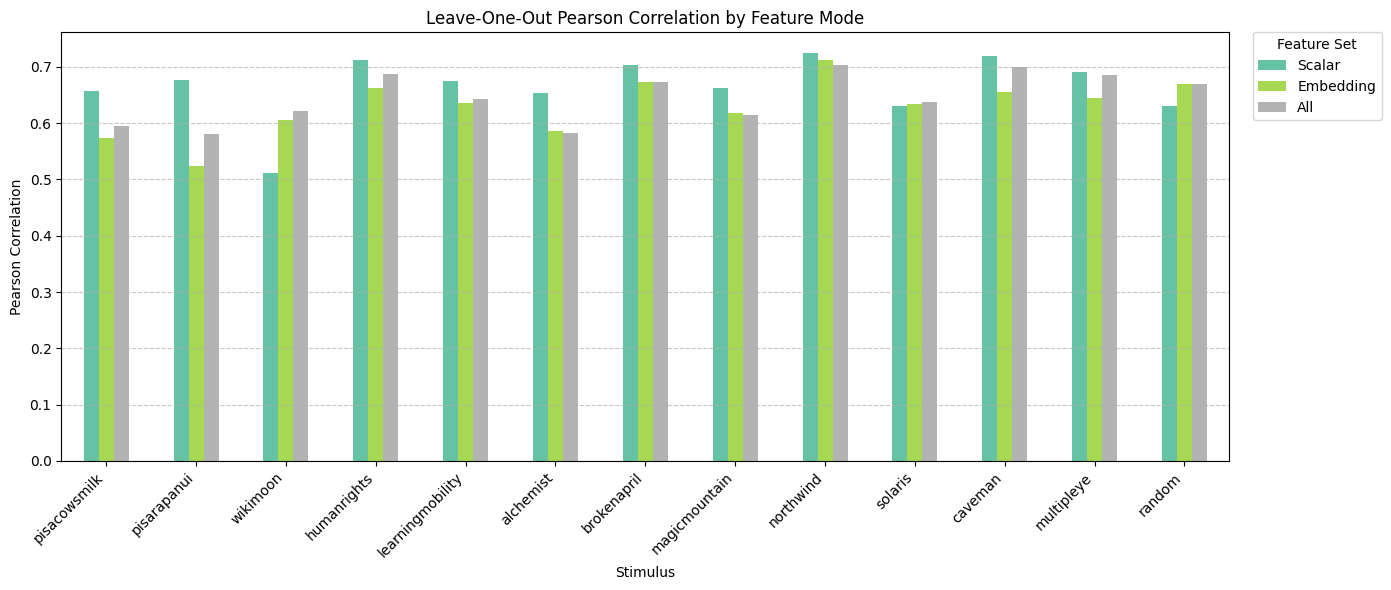

In [74]:
# Plot leave-one-out results
stimuli = np.append(results_df['stimulus'].unique(), 'random')
accuracies_scalar = np.append(results_df[results_df['mode'] == 'scalar']['accuracy'].values, 93.57)
accuracies_embedding = np.append(results_df[results_df['mode'] == 'embedding']['accuracy'].values, 89.34)
accuracies_combined = np.append(results_df[results_df['mode'] == 'combined']['accuracy'].values, 89.25)

mse_scalar = np.append(results_df[results_df['mode'] == 'scalar']['loss'].values, 0.60)
mse_embedding = np.append(results_df[results_df['mode'] == 'embedding']['loss'].values, 0.54)
mse_combined = np.append(results_df[results_df['mode'] == 'combined']['loss'].values, 0.54)

r2_scalar = np.append(results_df[results_df['mode'] == 'scalar']['r2'].values, 0.37)
r2_embedding = np.append(results_df[results_df['mode'] == 'embedding']['r2'].values, 0.43)
r2_combined = np.append(results_df[results_df['mode'] == 'combined']['r2'].values, 0.44)

pearson_scalar = np.append(results_df[results_df['mode'] == 'scalar']['pearson'].values, 0.63)
pearson_embedding = np.append(results_df[results_df['mode'] == 'embedding']['pearson'].values, 0.67)
pearson_combined = np.append(results_df[results_df['mode'] == 'combined']['pearson'].values, 0.67)

barplot_metric(stimuli, accuracies_scalar, accuracies_embedding, accuracies_combined, 'Accuracy', title='Leave-One-Out Accuracy by Feature Mode', xlabel='Stimulus')
barplot_metric(stimuli, mse_scalar, mse_embedding, mse_combined, 'MSE', title='Leave-One-Out MSE by Feature Mode', xlabel='Stimulus')
barplot_metric(stimuli, r2_scalar, r2_embedding, r2_combined, 'R2', title='Leave-One-Out R2 by Feature Mode', xlabel='Stimulus')
barplot_metric(stimuli, pearson_scalar, pearson_embedding, pearson_combined, 'Pearson Correlation', title='Leave-One-Out Pearson Correlation by Feature Mode', xlabel='Stimulus')

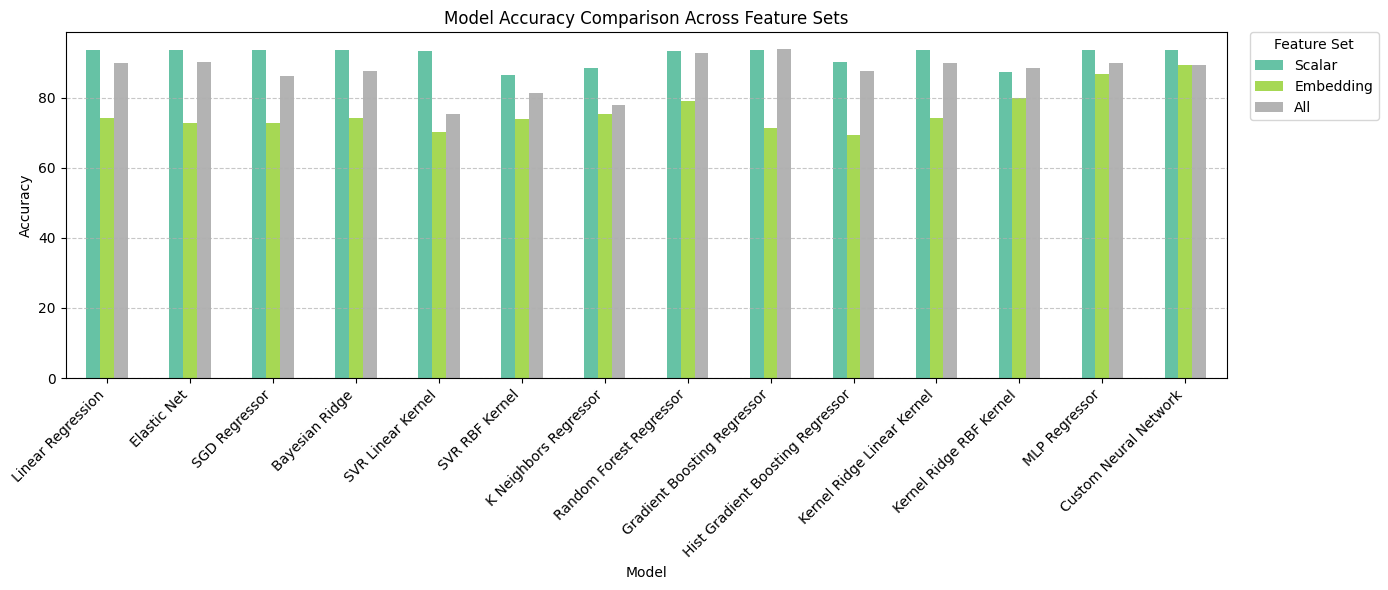

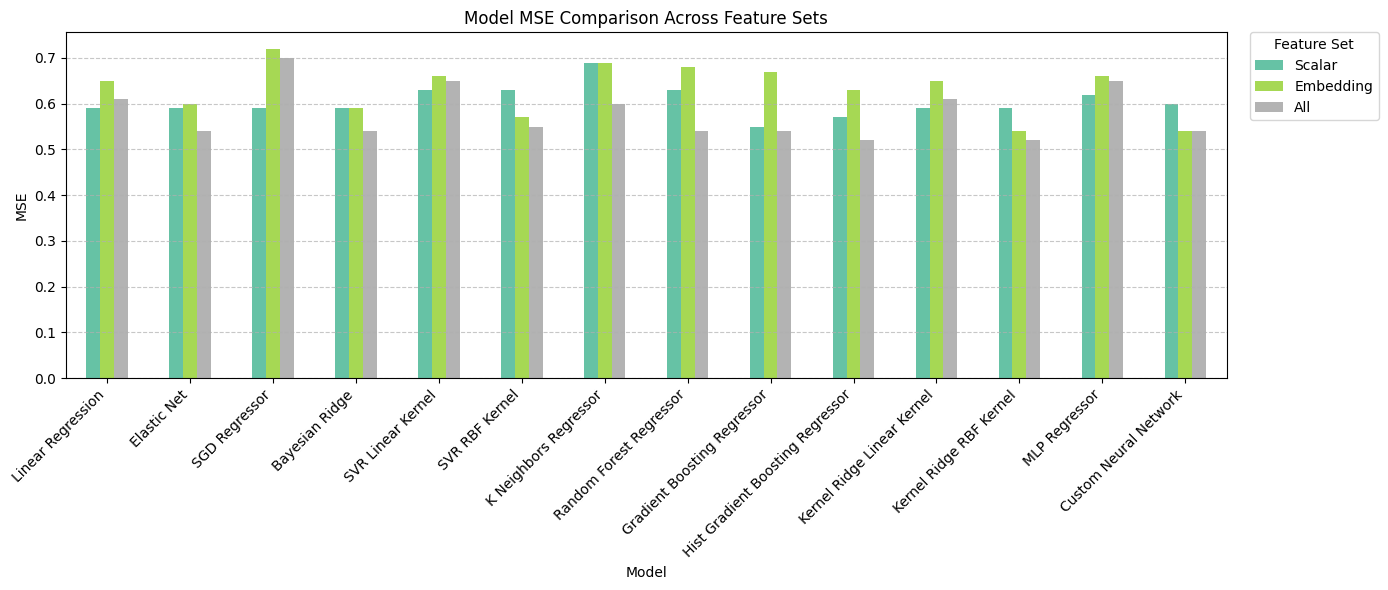

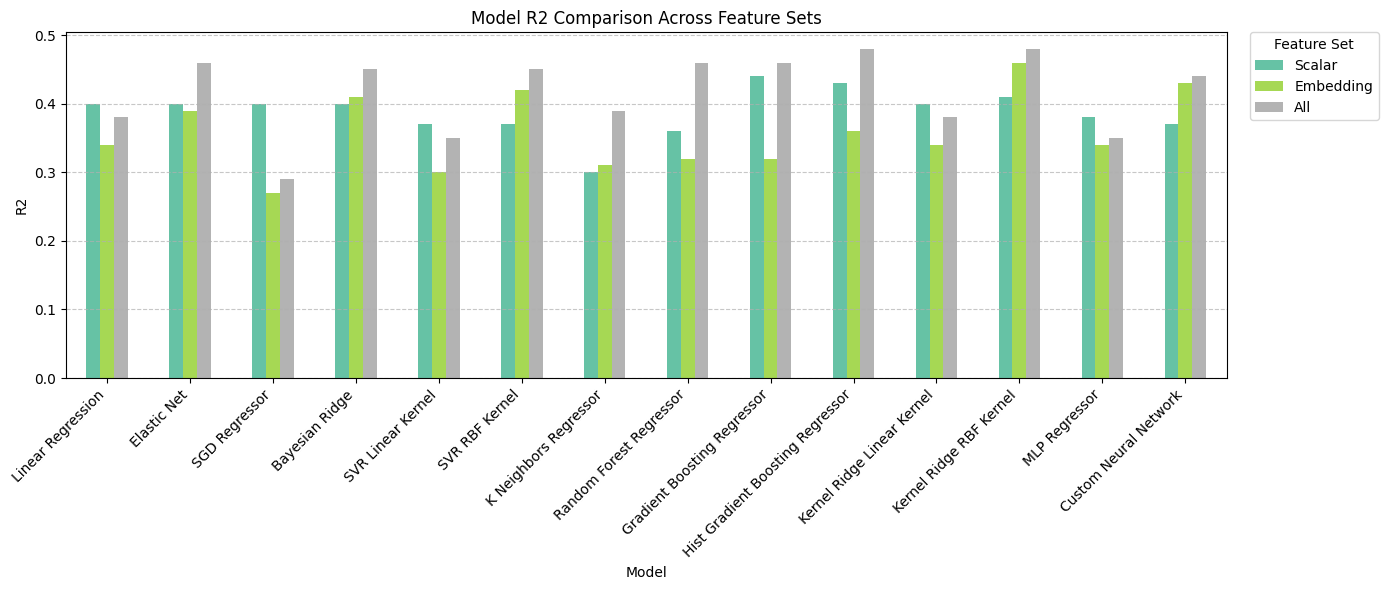

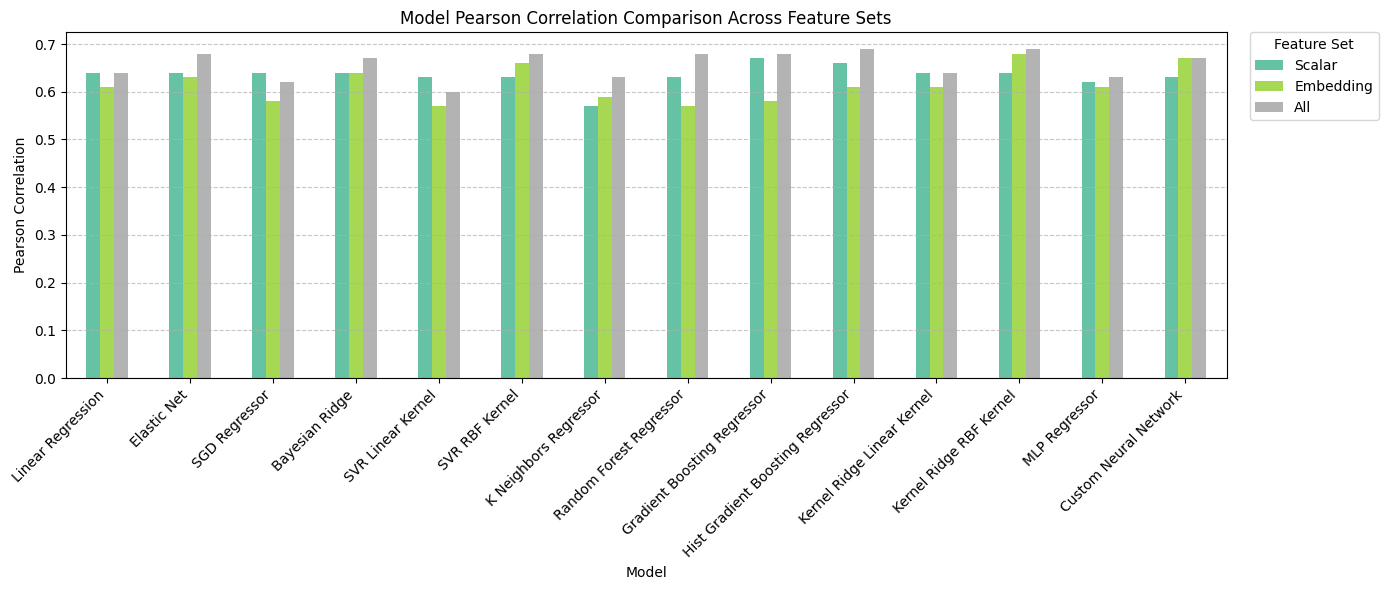

In [ ]:
# Plot accuracies
models = [
    "Linear Regression", 
    "Elastic Net", 
    "SGD Regressor", 
    "Bayesian Ridge", 
    "SVR Linear Kernel", 
    "SVR RBF Kernel", 
    "K Neighbors Regressor", 
    "Random Forest Regressor", 
    "Gradient Boosting Regressor", 
    "Hist Gradient Boosting Regressor", 
    "Kernel Ridge Linear Kernel", 
    "Kernel Ridge RBF Kernel", 
    "MLP Regressor", 
    "Custom Neural Network"
]

# Accuracy
accuracies_non_embedding = [
    93.61, 93.59, 93.65, 93.61, 93.34, 86.52, 88.59, 93.32,
    93.76, 90.13, 93.61, 87.42, 93.67, 93.57
]
accuracies_embedding = [
    74.29, 72.73, 72.90, 74.25, 70.27, 74.08, 75.26, 79.03,
    71.49, 69.28, 74.32, 79.85, 86.72, 89.34
]
accuracies_all = [
    90.08, 90.21, 86.25, 87.54, 75.27, 81.34, 78.08, 92.84,
    94.00, 87.75, 90.06, 88.43, 89.99, 89.25
]

# MSE
mse_non_embedding = [
    0.59, 0.59, 0.59, 0.59, 0.63, 0.63, 0.69, 0.63,
    0.55, 0.57, 0.59, 0.59, 0.62, 0.60
]
mse_embedding = [
    0.65, 0.60, 0.72, 0.59, 0.66, 0.57, 0.69, 0.68,
    0.67, 0.63, 0.65, 0.54, 0.66, 0.54
]
mse_all = [
    0.61, 0.54, 0.70, 0.54, 0.65, 0.55, 0.60, 0.54,
    0.54, 0.52, 0.61, 0.52, 0.65, 0.54
]

# Pearson
pearson_non_embedding = [
    0.64, 0.64, 0.64, 0.64, 0.63, 0.63, 0.57, 0.63,
    0.67, 0.66, 0.64, 0.64, 0.62, 0.63
]
pearson_embedding = [
    0.61, 0.63, 0.58, 0.64, 0.57, 0.66, 0.59, 0.57,
    0.58, 0.61, 0.61, 0.68, 0.61, 0.67
]
pearson_all = [
    0.64, 0.68, 0.62, 0.67, 0.60, 0.68, 0.63, 0.68,
    0.68, 0.69, 0.64, 0.69, 0.63, 0.67
]

# R2
r2_non_embedding = [
    0.40, 0.40, 0.40, 0.40, 0.37, 0.37, 0.30, 0.36,
    0.44, 0.43, 0.40, 0.41, 0.38, 0.37
]
r2_embedding = [
    0.34, 0.39, 0.27, 0.41, 0.30, 0.42, 0.31, 0.32,
    0.32, 0.36, 0.34, 0.46, 0.34, 0.43
]
r2_all = [
    0.38, 0.46, 0.29, 0.45, 0.35, 0.45, 0.39, 0.46,
    0.46, 0.48, 0.38, 0.48, 0.35, 0.44
]

barplot_metric(models, accuracies_non_embedding, accuracies_embedding, accuracies_all, "Accuracy", title="Model Accuracy Comparison Across Feature Sets", xlabel="Model")
barplot_metric(models, mse_non_embedding, mse_embedding, mse_all, "MSE", title="Model MSE Comparison Across Feature Sets", xlabel="Model")
barplot_metric(models, r2_non_embedding, r2_embedding, r2_all, "R2", title="Model R2 Comparison Across Feature Sets", xlabel="Model")
barplot_metric(models, pearson_non_embedding, pearson_embedding, pearson_all, "Pearson Correlation", title="Model Pearson Correlation Comparison Across Feature Sets", xlabel="Model")